## Problem Set 2 - Xuhui Bai

### Function set up

In [1]:
def covidData(Nsamp):
    # Set seed so we all have the same data
    np.random.seed(11)
    # age as a uniform value [0,1]
    age = np.random.uniform(low=0.0,high=1.0,size=Nsamp)
    # Smoke?
    smoke = np.random.randint(low=0,high=2,size=Nsamp)
    # number of smokers and nonsmokers
    nSmoke = np.sum(smoke)
    nnSmoke = Nsamp - nSmoke
    death = np.zeros(Nsamp,dtype=int)
    # Death prob = 0.5 if you don't smoke
    death[smoke==0] = (np.random.uniform(size=nnSmoke)<0.5)
    # If you do smoke, then it depends quadratically on age
    death[smoke==1] = (np.random.uniform(size=(nSmoke))<3./2.*age[smoke==1]**2)
    # stack predictor variables in matrix
    xPredict = np.stack((age,smoke),axis=1)
    return xPredict, death

In [2]:
# A function to automate MC experiments
def MCtraintest(nmc,X,y,modelObj,testFrac):
    trainScore = np.zeros(nmc)
    testScore  = np.zeros(nmc)
    for i in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=testFrac)
        modelObj.fit(X_train,y_train)
        trainScore[i] = modelObj.score(X_train,y_train)
        testScore[i]  = modelObj.score(X_test,y_test)
    return (trainScore,testScore)

### 1. Generate a sample with 100 data points using covidData. What is the mean for the death rate overall, for smokers, and for nonsmokers.

In [3]:
import numpy as np


dataset = covidData(100)
print("The mean for death rate overall: {:.3f}".format(dataset[-1].mean()))
print("The mean for death rate for smoker: {:.3f}".format(dataset[-1][dataset[0][:,1]==1].mean()))
print("The mean for death rate for non-smoker: {:.3f}".format(dataset[-1][dataset[0][:,1]==0].mean()))


The mean for death rate overall: 0.540
The mean for death rate for smoker: 0.585
The mean for death rate for non-smoker: 0.489


### 2. First set up code to evaluate a nearest neighbor classification system. Plot the training and test set mean score (accuracy) from a 250 length monte-carlo simulation. Set the test set at 0.25 of the total sample. Do this for various neighbor sizes from 1 to 30. What looks like the optimal neighbor size for test data?

The optimal neighbor size for test data is 5


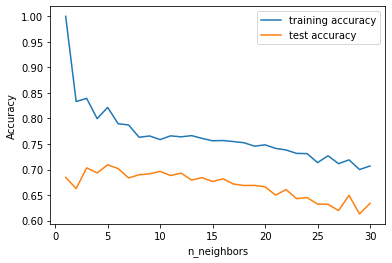

In [7]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


trainscore_set = []
testscore_set = []
neighbors_settings = range(1, 31)
for size in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=size)
    trainscore_set.append(MCtraintest(250, dataset[0], dataset[1], knn, 0.25)[0].mean())
    testscore_set.append(MCtraintest(250, dataset[0], dataset[1], knn, 0.25)[1].mean())
    

plt.plot(neighbors_settings, trainscore_set, label="training accuracy") 
plt.plot(neighbors_settings, testscore_set, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

print("The optimal neighbor size for test data is {}".format(testscore_set.index(max(testscore_set))+1))

### 3. What is the score for the training sample with one neighbor?

In [5]:
print("The score for the training sample with one neighbor is {:.3f}".format(trainscore_set[0]))

The score for the training sample with one neighbor is 1.000


### 4. Find the mean training and test classification accuracy for a logistic regression on the same data. You do not know how to do this in Scikit learn, but it is easy. The function logisticRegression() sets up the logistic regression in the same way as the nearest neighbor classification. Use this with the default parameters. Run this for the same monte-carlo specification as before (no need to sweep through parameters). Report the mean for training and test set scores.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


lr = LogisticRegression(solver='lbfgs') ## To avoid the FutureWarning message
train_mean,test_mean= MCtraintest(250, dataset[0], dataset[1], lr, 0.25)
print("The mean of accuracy for training data is {:.3f}".format(train_mean.mean()))
print("The mean of accuracy for testing data is {:.3f}".format(test_mean.mean()))


The mean of accuracy for training data is 0.681
The mean of accuracy for testing data is 0.662
